## Librairies

In [1]:
from openclassrooms.p6 import *
import os, warnings
from tqdm import tqdm

from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn import set_config
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split, ParameterGrid
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, adjusted_rand_score

from skimage import io
from skimage.color import rgb2gray
from skimage.morphology import disk
from skimage.feature import ORB, SIFT
from skimage import filters

## Configs

In [2]:
STORAGE_PATH = "../data"
FILE_NAME = "data.csv"

In [8]:
pd.set_option("display.max_columns", 200)
pd.set_option("display.max_colwidth", 500)
warnings.filterwarnings('ignore')
set_config(display="diagram")
plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['xtick.labelbottom'] = False
plt.rcParams['ytick.labelleft'] = False
plt.rcParams['xtick.bottom'] = False
plt.rcParams['ytick.left'] = False

## Data

In [3]:
data = pd.read_csv(os.path.join(STORAGE_PATH, FILE_NAME))

In [4]:
images = io.ImageCollection(os.path.join(STORAGE_PATH, 'Images', '*.jpg'))
y = [data.loc[data.uniq_id == f.split('/')[-1][:-4], 'category_0'].values[0] for f in images.files]
n_images =len(images)
print("Number of images:", n_images)

/opt/conda/lib/python3.7/site-packages/PIL/Image.py:2921: DecompressionBombWarning: Image size (93680328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,


Number of images: 1050


# EDA

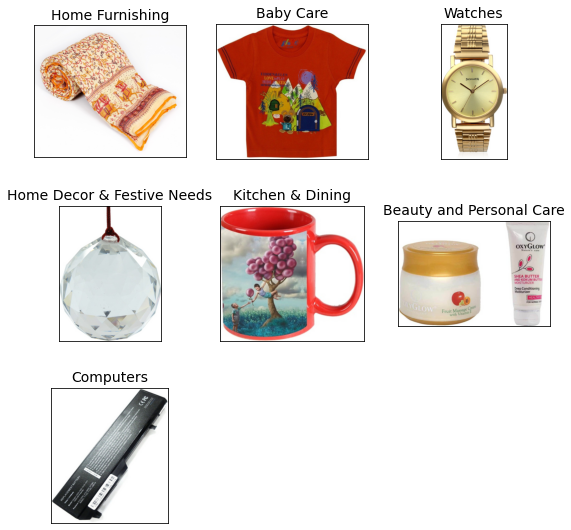

In [4]:
plt.figure(figsize=(8, 8))
for i, categories in enumerate(data.category_0.unique()):
    plt.subplot(3, 3, i+1)
    plt.title(categories, size=14)
    uniq_id = data.loc[data.category_0 == categories, "uniq_id"].sample(1).iloc[0]
    img = io.imread(os.path.join(STORAGE_PATH, "Images", uniq_id + ".jpg"))
    plt.imshow(img)
plt.tight_layout(pad=3)
plt.show()

In [5]:
resolutions = [img[0].shape[0] * img[0].shape[1] for img in images]
resolutions_df = pd.DataFrame({'resolution': resolutions, 'category': y})

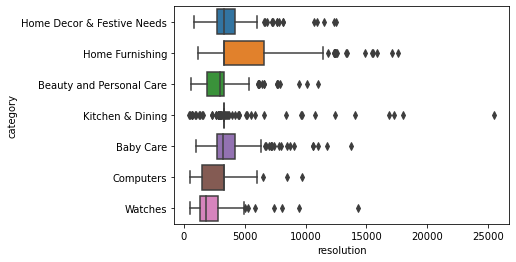

In [7]:
sns.boxplot(x='resolution', y='category', data=resolutions_df)
plt.show()

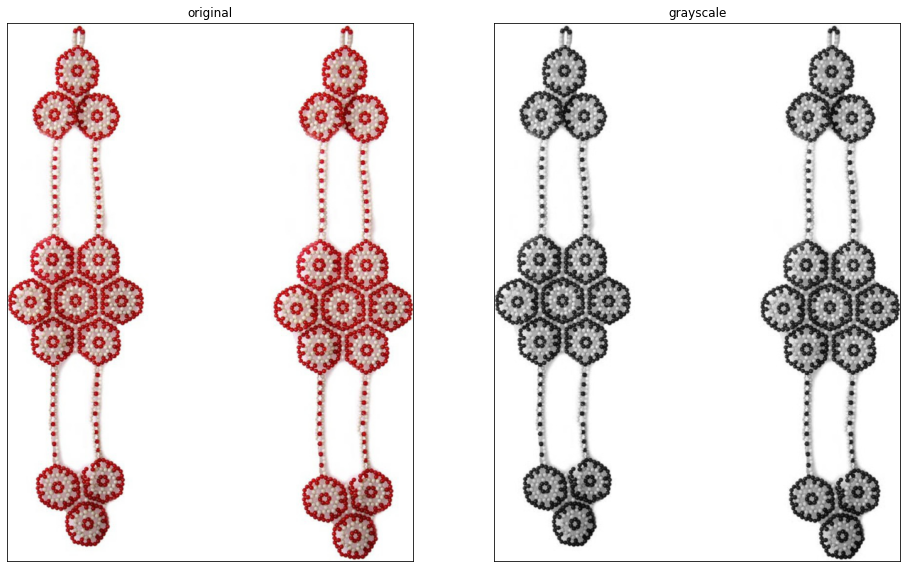

In [8]:
plt.figure(figsize=(16, 16))

img = images[np.random.randint(0, 1050)] 
img_gs = rgb2gray(img)

plt.subplot(1, 2, 1)
plt.title('original')
plt.imshow(img)

plt.subplot(1, 2, 2)
plt.title('grayscale')
plt.imshow(img_gs)

plt.show()

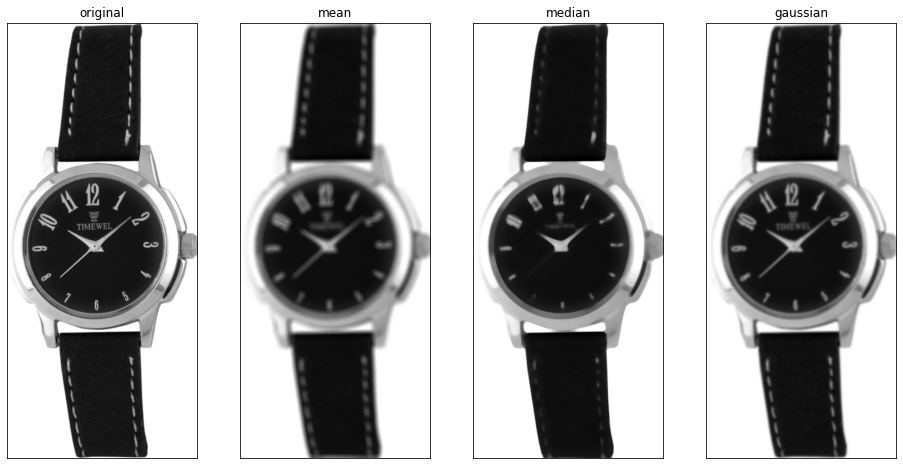

In [12]:
neighborhood = disk(10)
img = rgb2gray(images[531])
mean_img = filters.rank.mean(img, neighborhood)
median_img = filters.rank.median(img, neighborhood)
gausian_img = filters.gaussian(img, sigma=3)

plt.figure(figsize=(16, 8))

plt.subplot(1, 4, 1)
plt.title('original')
plt.imshow(img)

plt.subplot(1, 4, 2)
plt.title('mean')
plt.imshow(mean_img)

plt.subplot(1, 4, 3)
plt.title('median')
plt.imshow(median_img)

plt.subplot(1, 4, 4)
plt.title('gaussian')
plt.imshow(gausian_img)

plt.show()

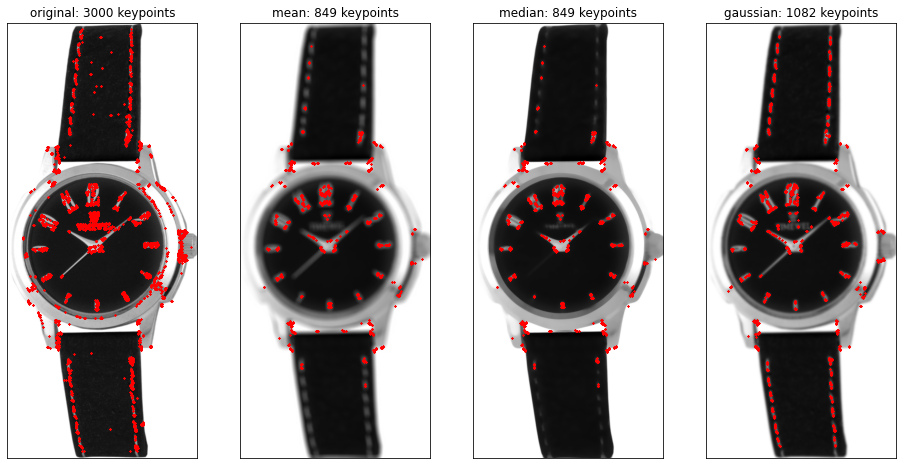

In [13]:
descriptor_extractor = ORB(n_keypoints=3000)

descriptor_extractor.detect_and_extract(img)
keypoints = descriptor_extractor.keypoints

descriptor_extractor.detect_and_extract(median_img)
keypoints_mean = descriptor_extractor.keypoints

descriptor_extractor.detect_and_extract(median_img)
keypoints_median = descriptor_extractor.keypoints

descriptor_extractor.detect_and_extract(gausian_img)
keypoints_gaussian = descriptor_extractor.keypoints

plt.figure(figsize=(16, 8))

plt.subplot(1, 4, 1)
plt.title(f'original: {len(keypoints)} keypoints')
plt.scatter(x=keypoints[:, 1], y=keypoints[:, 0], c='r', s=2, marker='x')
plt.imshow(img)

plt.subplot(1, 4, 2)
plt.title(f'mean: {len(keypoints_mean)} keypoints')
plt.scatter(x=keypoints_mean[:, 1], y=keypoints_mean[:, 0], c='r', s=2, marker='x')
plt.imshow(mean_img)

plt.subplot(1, 4, 3)
plt.title(f'median: {len(keypoints_median)} keypoints')
plt.scatter(x=keypoints_median[:, 1], y=keypoints_median[:, 0], c='r', s=2, marker='x')
plt.imshow(median_img)

plt.subplot(1, 4, 4)
plt.title(f'gaussian: {len(keypoints_gaussian)} keypoints')
plt.scatter(x=keypoints_gaussian[:, 1], y=keypoints_gaussian[:, 0], c='r', s=2, marker='x')
plt.imshow(gausian_img)

plt.show()

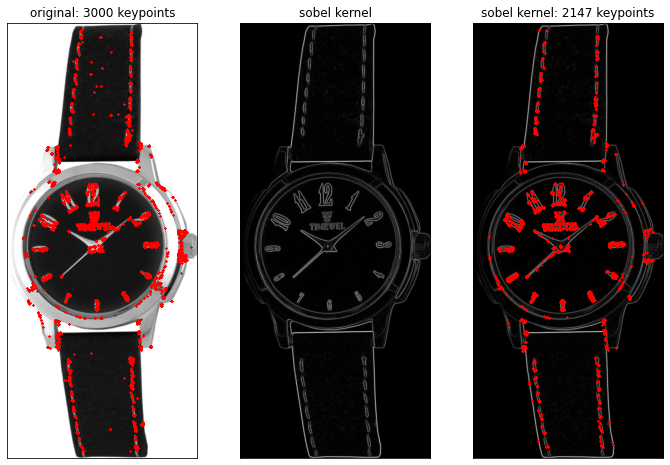

In [12]:
sobel_img = filters.sobel(img)

img = rgb2gray(images[531])
descriptor_extractor = ORB(n_keypoints=3000)
descriptor_extractor.detect_and_extract(sobel_img)
keypoints_sobel = descriptor_extractor.keypoints

plt.figure(figsize=(16, 8))
plt.subplot(1, 4, 1)
plt.title(f'original: {len(keypoints)} keypoints')
plt.scatter(x=keypoints[:, 1], y=keypoints[:, 0], c='r', s=2, marker='x')
plt.imshow(img)

plt.subplot(1, 4, 2)
plt.imshow(sobel_img)
plt.title('sobel kernel')

plt.subplot(1, 4, 3)
plt.imshow(sobel_img)
plt.title(f'sobel kernel: {len(keypoints_sobel)} keypoints')
plt.scatter(x=keypoints_sobel[:, 1], y=keypoints_sobel[:, 0], c='r', s=2, marker='x')
plt.show()

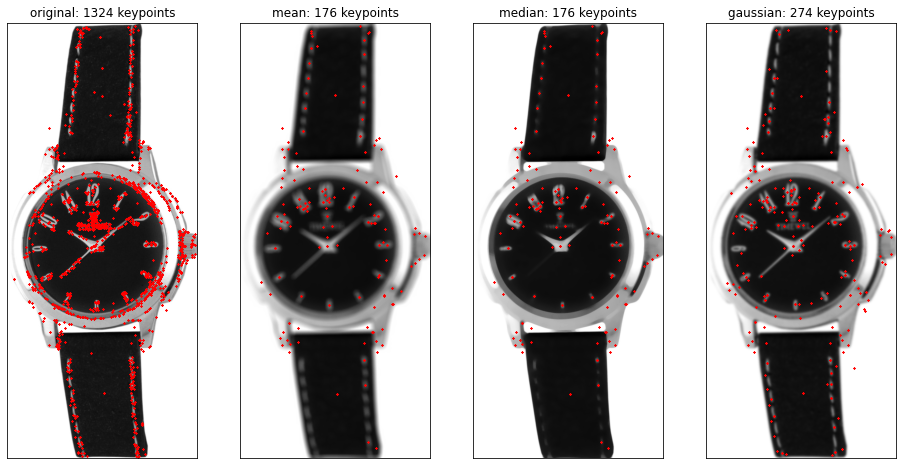

In [13]:
descriptor_extractor = SIFT()

descriptor_extractor.detect_and_extract(img)
keypoints = descriptor_extractor.keypoints

descriptor_extractor.detect_and_extract(median_img)
keypoints_mean = descriptor_extractor.keypoints

descriptor_extractor.detect_and_extract(median_img)
keypoints_median = descriptor_extractor.keypoints

descriptor_extractor.detect_and_extract(gausian_img)
keypoints_gaussian = descriptor_extractor.keypoints

plt.figure(figsize=(16, 8))

plt.subplot(1, 4, 1)
plt.title(f'original: {len(keypoints)} keypoints')
plt.scatter(x=keypoints[:, 1], y=keypoints[:, 0], c='r', s=2, marker='x')
plt.imshow(img)

plt.subplot(1, 4, 2)
plt.title(f'mean: {len(keypoints_mean)} keypoints')
plt.scatter(x=keypoints_mean[:, 1], y=keypoints_mean[:, 0], c='r', s=2, marker='x')
plt.imshow(mean_img)

plt.subplot(1, 4, 3)
plt.title(f'median: {len(keypoints_median)} keypoints')
plt.scatter(x=keypoints_median[:, 1], y=keypoints_median[:, 0], c='r', s=2, marker='x')
plt.imshow(median_img)

plt.subplot(1, 4, 4)
plt.title(f'gaussian: {len(keypoints_gaussian)} keypoints')
plt.scatter(x=keypoints_gaussian[:, 1], y=keypoints_gaussian[:, 0], c='r', s=2, marker='x')
plt.imshow(gausian_img)

plt.show()

# Classification


## Supervized approach

In [4]:
data = data.loc[data.uniq_id != "59d964c38c787f829c6cfa5629e4df90"].reset_index(drop=True)
images = [cv2.imread(os.path.join(STORAGE_PATH, "Images", img_id + '.jpg'), flags=cv2.IMREAD_GRAYSCALE) for img_id in tqdm(data.uniq_id)]

n_images = data.uniq_id.nunique()
print("Number of images:", n_images)

100%|██████████| 1049/1049 [00:39<00:00, 26.82it/s]

Number of images: 1049


In [5]:
X_train, X_test, y_train, y_test = train_test_split(images, data.category_0, random_state=0)

n_features = 2000
n_clusters = 400

pipe = Pipeline(steps=[
    ('filter', ImagesFilter()),
    ('ORB', CustomORB(n_features)),
    ('BOVW', BagOfVisualWords(n_clusters=n_clusters, n_features=n_features)),
    ('PCA', CustomPCA(ratio=None)),
    ('classifier', RandomForestClassifier())
])

param_grid = {
    "filter__median": [True, False],
    "filter__gaussian": [True, False],
    "PCA__ratio": [None, 0.95, 0.99],
}

display(pipe)

Pipeline(steps=[('filter', ImagesFilter()), ('ORB', CustomORB(n_features=2000)),
                ('BOVW', BagOfVisualWords(n_clusters=400, n_features=2000)),
                ('PCA', CustomPCA(ratio=None)),
                ('classifier', RandomForestClassifier())])

In [6]:
results = pd.DataFrame()

for parameters in tqdm(ParameterGrid(param_grid)):
    
    pipe = pipe.set_params(**parameters)
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)

    score = accuracy_score(y_test, y_pred)
    results = results.append({'score': score, 'parameters': parameters} , ignore_index=True)

100%|██████████| 12/12 [12:56<00:00, 64.72s/it]


In [7]:
results.loc[results.score == results.score.max()]

,score,parameters
0,0.098859,"{'PCA__ratio': None, 'filter__gaussian': True,..."
1,0.098859,"{'PCA__ratio': None, 'filter__gaussian': True,..."
2,0.098859,"{'PCA__ratio': None, 'filter__gaussian': False..."
3,0.098859,"{'PCA__ratio': None, 'filter__gaussian': False..."
4,0.098859,"{'PCA__ratio': 0.95, 'filter__gaussian': True,..."
5,0.098859,"{'PCA__ratio': 0.95, 'filter__gaussian': True,..."
6,0.098859,"{'PCA__ratio': 0.95, 'filter__gaussian': False..."
7,0.098859,"{'PCA__ratio': 0.95, 'filter__gaussian': False..."
8,0.098859,"{'PCA__ratio': 0.99, 'filter__gaussian': True,..."
9,0.098859,"{'PCA__ratio': 0.99, 'filter__gaussian': True,..."


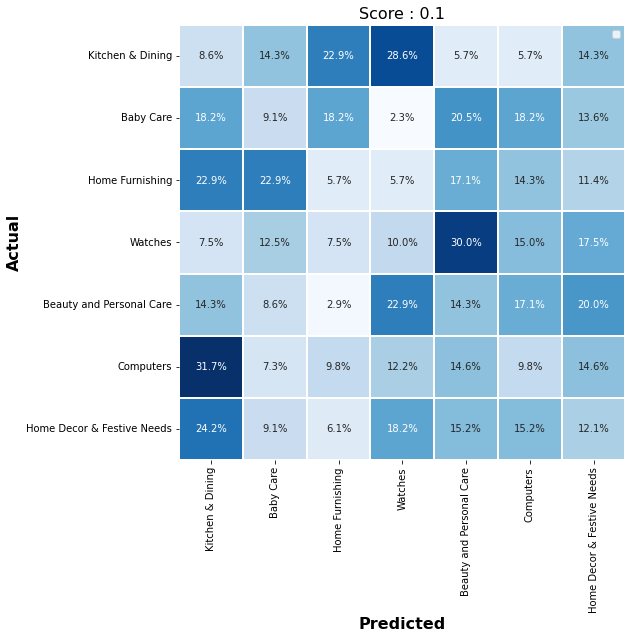

In [8]:
cm = ConfusionMatrix(y_test, y_pred, accuracy_score)
print(cm)

## Unservised approach

In [6]:
n_features = 2000
n_clusters = 400

X, y  = images, data.category_0

kmeans = KMeans(n_clusters=data.category_0.nunique(), random_state=0)
pipe = Pipeline(steps=[
    ('filter', ImagesFilter()),
    ('ORB', CustomORB(n_features)),
    ('BOVW', BagOfVisualWords(n_clusters=n_clusters, n_features=n_features)),
    ('PCA', CustomPCA(ratio=None)),
    ('classifier', CustomClustering(kmeans))
])

param_grid = {
    "filter__median": [True, False],
    "filter__gaussian": [True, False],
    "PCA__ratio": [None, 0.95, 0.99],
}

display(pipe)

Pipeline(steps=[('filter', ImagesFilter()), ('ORB', CustomORB(n_features=2000)),
                ('BOVW', BagOfVisualWords(n_clusters=400, n_features=2000)),
                ('PCA', CustomPCA(ratio=None)),
                ('classifier',
                 CustomClustering(model=KMeans(n_clusters=7, random_state=0)))])

In [7]:
results = pd.DataFrame()

for parameters in tqdm(ParameterGrid(param_grid)):
    
    pipe = pipe.set_params(**parameters)
    pipe.fit(X, y)
    y_pred = pipe.predict(X)

    score = adjusted_rand_score(y, y_pred)
    results = results.append({'score': score, 'parameters': parameters} , ignore_index=True)

100%|██████████| 12/12 [24:19<00:00, 121.62s/it]


In [8]:
best_results_parameters = results.loc[results.score == results.score.max(), 'parameters'].iloc[0]
results.loc[results.score == results.score.max()]

,score,parameters
0,0.037871,"{'PCA__ratio': None, 'filter__gaussian': True,..."


In [9]:
pipe = pipe.set_params(**best_results_parameters)
pipe.fit(X, y)
y_pred = pipe.predict(X)

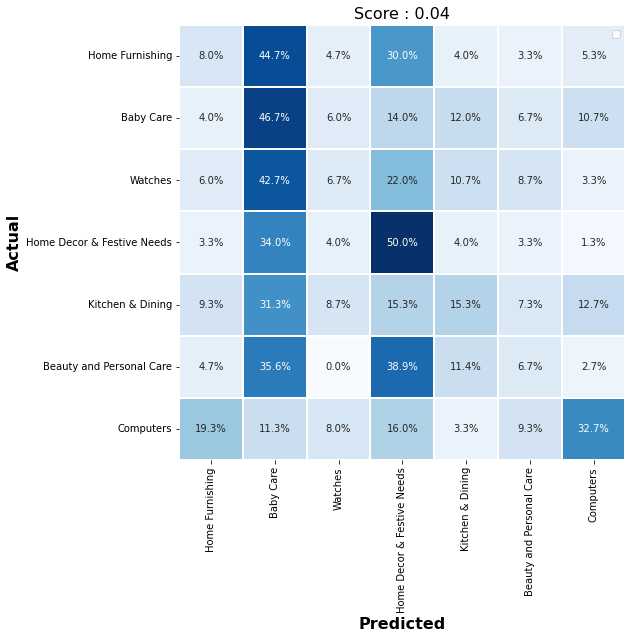

In [10]:
cm = ConfusionMatrix(y, y_pred, adjusted_rand_score)
print(cm)